In [1]:
#importing numpy, pandas and matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#reading the state wide buying csv
state_buy_df=pd.read_csv('State_Zhvi_SingleFamilyResidence.csv', index_col= 'RegionName')


#reading the statewide rental csv
state_rent_df=pd.read_csv('State_MedianRentalprice_Sfr.csv', index_col= 'RegionName')


# Price to rent ratio

In [3]:
state_buy_df.sample(3)

,Unnamed: 0,RegionID,SizeRank,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
RegionName,,,,,,,,,,,,,,,,,,,,,
Maryland,18,27,18,State,MD,154040.0,154040.0,154042.0,154099.0,154244.0,...,319176.0,319564.0,320026.0,320549.0,321063.0,321331.0,321649.0,322085.0,322627.0,323466.0
New Jersey,10,40,10,State,NJ,167436.0,167117.0,166885.0,166449.0,166110.0,...,345291.0,346019.0,346545.0,346884.0,347264.0,347722.0,348517.0,349410.0,350433.0,351382.0
South Carolina,23,51,23,State,SC,97030.0,97138.0,97176.0,97377.0,97527.0,...,187016.0,187708.0,188361.0,188995.0,189684.0,190311.0,190927.0,191473.0,192063.0,192752.0


In [4]:
state_buy_df.columns

Index(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionType', 'StateName',
       '1996-01-31', '1996-02-29', '1996-03-31', '1996-04-30', '1996-05-31',
       ...
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31'],
      dtype='object', length=296)

In [53]:
# filtering the data for the year 2019

state_buy_df_2019=state_buy_df.filter(['2019-01-31','2019-02-28','2019-03-31','2019-04-30','2019-05-31','2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31'])

In [54]:
#Based on standarad calculation for price to rent ratio. Might be more appropriate if we could have clear dataset with average mortgage payments.
state_buy_df_2019['average']=state_buy_df_2019.mean(axis=1)

In [55]:
state_buy_df_2019.sample(3)

,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,average
RegionName,,,,,,,,,,,,,
Oklahoma,125496.0,126020.0,126468.0,126949.0,127298.0,127810.0,128383.0,128964.0,129481.0,129956.0,130518.0,131073.0,128201.333333
Alaska,312736.0,315157.0,317841.0,321433.0,322265.0,323118.0,323206.0,324163.0,324420.0,322877.0,321087.0,319754.0,320671.416667
Tennessee,178721.0,179528.0,180300.0,180934.0,181710.0,182441.0,183145.0,183919.0,184786.0,185726.0,186743.0,187767.0,182976.666667


In [8]:
state_rent_df.columns

Index(['Unnamed: 0', 'SizeRank', '2010-01', '2010-02', '2010-03', '2010-04',
       '2010-05', '2010-06', '2010-07', '2010-08',
       ...
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12'],
      dtype='object', length=122)

In [51]:
#Filter the rental data for the year 2019
# possible for more efficient ways to filter for specific range!

state_rent_df_2019=state_rent_df.filter(['2019-01','2019-02','2019-03','2019-04','2019-05','2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
       '2019-11', '2019-12'])

In [52]:
state_rent_df_2019.head(3)

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
RegionName,,,,,,,,,,,,
California,2800.0,2800,2800,2895,2900.0,2900.0,2895.0,2900,2899,2800.0,2825.0,2800
Texas,1550.0,1550,1550,1595,1600.0,1600.0,1600.0,1600,1599,1595.0,1590.0,1575
Florida,1800.0,1800,1850,1866,1870.0,1850.0,1815.0,1800,1800,1795.0,1750.0,1750


In [49]:
# Avg rent by state
state_rent_df_2019['average']=state_rent_df.mean(axis=1)

In [50]:
state_rent_df_2019.sample(3)

,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,average
RegionName,,,,,,,,,,,,,,
Colorado,1995,1995.0,2000,2000,2095,2100.0,2100.0,2095.0,2095,2100,2100.0,2100.0,2100,1610.404959
Nebraska,1200,1200.0,1200,1295,1300,1300.0,1300.0,1295.0,1250,1249,1200.0,1200.0,1200,1115.385321
Illinois,1500,1492.0,1500,1500,1515,1550.0,1575.0,1595.0,1575,1560,1545.0,1500.0,1500,1512.805785


In [13]:
#To calculate price to rent ratio we need the average rent for 12 months
state_rent_df_2019['Average Annual Rent']= state_rent_df_2019['average'].apply(lambda x: x*12)

In [14]:
state_rent_df_2019.sample(3)

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,average,Average Annual Rent
RegionName,,,,,,,,,,,,,,
Utah,1522.5,1500,1525,1550,1595.0,1550.0,1595.0,1600,1600,1575.0,1550.0,1550,1304.780374,15657.364486
North Dakota,1323.0,1300,1350,1368,1350.0,1295.0,1295.0,1300,1300,1300.0,1300.0,1250,1257.000000,15084.000000
Nevada,1595.0,1595,1600,1650,1650.0,1650.0,1650.0,1650,1635,1615.5,1610.0,1600,1299.363636,15592.363636


In [15]:
#Merging rent and buy dataframes

state_joined_df=pd.merge(state_buy_df_2019, state_rent_df_2019, left_index=True, right_index=True)

In [16]:
state_joined_df.sample(3)

,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,average_y,Average Annual Rent
RegionName,,,,,,,,,,,,,,,,,,,,,
Kansas,147284.0,147733.0,148185.0,148642.0,149080.0,149633.0,150263.0,150878.0,151398.0,151871.0,...,1100.0,1100.0,1095.0,1050,1025,1000.0,1050.0,1050,1035.418182,12425.018182
Arizona,262288.0,263472.0,264527.0,265203.0,266055.0,267246.0,268612.0,270270.0,271740.0,273403.0,...,1600.0,1600.0,1600.0,1595,1595,1550.0,1549.0,1545,1259.183333,15110.200000
California,562344.0,561231.0,560722.0,560995.0,561637.0,562386.0,563398.0,564896.0,566911.0,569019.0,...,2900.0,2900.0,2895.0,2900,2899,2800.0,2825.0,2800,2237.876147,26854.513761


In [17]:
state_joined_df['price to rent ratio'] =state_joined_df['average_x']/state_joined_df['Average Annual Rent']

In [18]:
state_joined_df.sample(3)

,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,average_y,Average Annual Rent,price to rent ratio
RegionName,,,,,,,,,,,,,,,,,,,,,
Tennessee,178721.0,179528.0,180300.0,180934.0,181710.0,182441.0,183145.0,183919.0,184786.0,185726.0,...,1375.0,1395.0,1395,1350,1350.0,1350.0,1350,1137.075000,13644.900000,13.409894
Wisconsin,192627.0,193398.0,194264.0,195263.0,196036.0,196834.0,197675.0,198608.0,199455.0,200373.0,...,1200.0,1200.0,1195,1200,1200.0,1200.0,1200,1133.831325,13605.975904,14.502518
Alaska,312736.0,315157.0,317841.0,321433.0,322265.0,323118.0,323206.0,324163.0,324420.0,322877.0,...,1750.0,1750.0,1750,1700,1700.0,1700.0,1650,1648.285000,19779.420000,16.212377


In [19]:
state_sorted_df=state_joined_df.sort_values(by = 'price to rent ratio', ascending = True)

In [21]:
state_sorted_df.head(3)

,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,average_y,Average Annual Rent,price to rent ratio
RegionName,,,,,,,,,,,,,,,,,,,,,
West Virginia,103662.0,103990.0,104314.0,104681.0,105012.0,105377.0,105743.0,106091.0,106375.0,106632.0,...,1000.0,1000.0,1000,975,980.0,1000.0,975,1041.377358,12496.528302,8.437897
Mississippi,121821.0,122261.0,122731.0,123271.0,123716.0,124129.0,124511.0,124920.0,125260.0,125624.0,...,1150.0,1150.0,1150,1100,1150.0,1172.5,1150,993.774775,11925.297297,10.416274
Oklahoma,125496.0,126020.0,126468.0,126949.0,127298.0,127810.0,128383.0,128964.0,129481.0,129956.0,...,1095.0,1095.0,1050,1050,1000.0,1000.0,1000,1011.315789,12135.789474,10.563906


# States where buying is prefered

In [113]:
#Finding out the states that are better to purchase i.e.,if price to rent ratio is <13 its better to purchase

states_to_buy_df = state_sorted_df[state_sorted_df['price to rent ratio'] < 13]
states_to_buy_df
                                                

,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,average_y,Average Annual Rent,price to rent ratio
RegionName,,,,,,,,,,,,,,,,,,,,,
West Virginia,103662.0,103990.0,104314.0,104681.0,105012.0,105377.0,105743.0,106091.0,106375.0,106632.0,...,1000.0,1000.0,1000,975,980.0,1000.0,975,1041.377358,12496.528302,8.437897
Mississippi,121821.0,122261.0,122731.0,123271.0,123716.0,124129.0,124511.0,124920.0,125260.0,125624.0,...,1150.0,1150.0,1150,1100,1150.0,1172.5,1150,993.774775,11925.297297,10.416274
Oklahoma,125496.0,126020.0,126468.0,126949.0,127298.0,127810.0,128383.0,128964.0,129481.0,129956.0,...,1095.0,1095.0,1050,1050,1000.0,1000.0,1000,1011.315789,12135.789474,10.563906
Arkansas,125077.0,125478.0,125813.0,126169.0,126555.0,127013.0,127431.0,127899.0,128338.0,128814.0,...,1100.0,1100.0,1100,1050,1075.0,1075.0,1050,961.834711,11542.016529,11.026619
Illinois,202458.0,202730.0,203007.0,203355.0,203598.0,203835.0,204142.0,204371.0,204487.0,204550.0,...,1575.0,1595.0,1575,1560,1545.0,1500.0,1500,1512.805785,18153.669421,11.227799
Louisiana,166587.0,166574.0,166737.0,166902.0,167148.0,167390.0,167699.0,167863.0,168098.0,168288.0,...,1250.0,1250.0,1200,1200,1200.0,1200.0,1200,1200.120833,14401.450000,11.637653
Kansas,147284.0,147733.0,148185.0,148642.0,149080.0,149633.0,150263.0,150878.0,151398.0,151871.0,...,1100.0,1095.0,1050,1025,1000.0,1050.0,1050,1035.418182,12425.018182,12.070734
Connecticut,270918.0,271340.0,271441.0,271849.0,271948.0,271993.0,272027.0,271967.0,272177.0,272390.0,...,2100.0,2000.0,2000,2000,2000.0,1950.0,2000,1871.694215,22460.330579,12.109283
Alabama,133989.0,134472.0,134991.0,135476.0,135955.0,136491.0,137034.0,137592.0,138138.0,138748.0,...,1095.0,1060.0,1049,1045,1050.0,1050.0,1050,937.654255,11251.851064,12.164132


# States where renting if prefered

In [23]:
states_to_rent_df = state_sorted_df[state_sorted_df['price to rent ratio'] > 15]

In [24]:
states_to_rent_df

,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,average_y,Average Annual Rent,price to rent ratio
RegionName,,,,,,,,,,,,,,,,,,,,,
New Hampshire,293504.0,294392.0,294857.0,295278.0,296312.0,297409.0,298543.0,299134.0,300032.0,301073.0,...,1900.0,1987.5,1950,1850,1800.0,1800.0,1800,1604.698347,19256.380165,15.480536
Massachusetts,426618.0,426994.0,426947.0,427121.0,427327.0,427745.0,428032.0,428824.0,430097.0,431656.0,...,2900.0,2815.0,2700,2600,2600.0,2600.0,2600,2299.270833,27591.250000,15.551685
Virginia,281415.0,282455.0,283362.0,284283.0,285075.0,285915.0,286818.0,287846.0,288922.0,289949.0,...,1800.0,1800.0,1750,1750,1695.0,1675.0,1650,1524.351240,18292.214876,15.662401
New Jersey,343316.0,343500.0,343809.0,344179.0,344716.0,345291.0,346019.0,346545.0,346884.0,347264.0,...,2100.0,2100.0,2100,2000,2000.0,2000.0,2000,1822.578512,21870.942149,15.803930
Maryland,317843.0,318495.0,318782.0,318748.0,318877.0,319176.0,319564.0,320026.0,320549.0,321063.0,...,1800.0,1800.0,1800,1799,1750.0,1750.0,1750,1680.830579,20169.966942,15.849072
North Dakota,237871.0,238344.0,238534.0,238892.0,239192.0,239808.0,240213.0,240678.0,241141.0,241705.0,...,1295.0,1295.0,1300,1300,1300.0,1300.0,1250,1257.000000,15084.000000,15.915203
South Dakota,201043.0,201685.0,202321.0,202925.0,203477.0,203995.0,204477.0,205067.0,205622.0,206197.0,...,1150.0,1150.0,1150,1150,1150.0,1150.0,1180,1050.097701,12601.172414,16.209497
Alaska,312736.0,315157.0,317841.0,321433.0,322265.0,323118.0,323206.0,324163.0,324420.0,322877.0,...,1750.0,1750.0,1750,1700,1700.0,1700.0,1650,1648.285000,19779.420000,16.212377
Delaware,259196.0,259406.0,259547.0,259502.0,259539.0,259731.0,259851.0,260015.0,260136.0,260016.0,...,1500.0,1500.0,1495,1495,1500.0,1475.0,1450,1310.198347,15722.380165,16.517474


# Growth % for rentals and purchases

In [69]:
state_rent_df1_2019=state_rent_df.filter(['2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
       '2019-11', '2019-12'])
state_buy_df1_2019.head(2)

,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,...,percentage change mar,percentage change apr,percentage change may,percentage change jun,percentage change july,percentage change aug,percentage change sep,percentage change oct,percentage change nov,percentage change dec
RegionName,,,,,,,,,,,,,,,,,,,,,
California,562820.0,562344.0,561231.0,560722.0,560995.0,561637.0,562386.0,563398.0,564896.0,566911.0,...,-0.090693,0.048687,0.114440,0.133360,0.179948,0.265887,0.356703,0.371840,0.373098,0.525263
Texas,203278.0,204240.0,205167.0,205770.0,206192.0,206662.0,207244.0,207904.0,208526.0,209208.0,...,0.293907,0.205083,0.227943,0.281619,0.318465,0.299177,0.327058,0.233261,0.236056,0.175079


In [71]:
# Calculate Growth % Change per month for each state
state_rent_df1_2019['percentage change jan']= state_rent_df1_2019.pct_change(axis='columns' )['2019-01'].mul(100)
state_rent_df1_2019['percentage change feb']= state_rent_df1_2019.pct_change(axis='columns' )['2019-02'].mul(100)
state_rent_df1_2019['percentage change mar']= state_rent_df1_2019.pct_change(axis='columns' )['2019-03'].mul(100)
state_rent_df1_2019['percentage change apr']= state_rent_df1_2019.pct_change(axis='columns' )['2019-04'].mul(100)
state_rent_df1_2019['percentage change may']= state_rent_df1_2019.pct_change(axis='columns' )['2019-05'].mul(100)
state_rent_df1_2019['percentage change jun']= state_rent_df1_2019.pct_change(axis='columns' )['2019-06'].mul(100)
state_rent_df1_2019['percentage change july']= state_rent_df1_2019.pct_change(axis='columns' )['2019-07'].mul(100)
state_rent_df1_2019['percentage change aug']= state_rent_df1_2019.pct_change(axis='columns' )['2019-08'].mul(100)
state_rent_df1_2019['percentage change sep']= state_rent_df1_2019.pct_change(axis='columns' )['2019-09'].mul(100)
state_rent_df1_2019['percentage change oct']= state_rent_df1_2019.pct_change(axis='columns' )['2019-10'].mul(100)
state_rent_df1_2019['percentage change nov']= state_rent_df1_2019.pct_change(axis='columns' )['2019-11'].mul(100)
state_rent_df_2019['percentage change dec']= state_rent_df1_2019.pct_change(axis='columns' )['2019-12'].mul(100)

In [72]:
state_rent_df1_2019.head()

,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,...,percentage change feb,percentage change mar,percentage change apr,percentage change may,percentage change jun,percentage change july,percentage change aug,percentage change sep,percentage change oct,percentage change nov
RegionName,,,,,,,,,,,,,,,,,,,,,
California,2800,2800.0,2800,2800,2895,2900.0,2900.0,2895.0,2900,2899,...,0.000000,0.000000,3.392857,0.172712,0.000000,-0.172414,0.172712,-0.034483,-3.414971,0.892857
Texas,1550,1550.0,1550,1550,1595,1600.0,1600.0,1600.0,1600,1599,...,0.000000,0.000000,2.903226,0.313480,0.000000,0.000000,0.000000,-0.062500,-0.250156,-0.313480
Florida,1800,1800.0,1800,1850,1866,1870.0,1850.0,1815.0,1800,1800,...,0.000000,2.777778,0.864865,0.214362,-1.069519,-1.891892,-0.826446,0.000000,-0.277778,-2.506964
Illinois,1500,1492.0,1500,1500,1515,1550.0,1575.0,1595.0,1575,1560,...,0.536193,0.000000,1.000000,2.310231,1.612903,1.269841,-1.253918,-0.952381,-0.961538,-2.912621
Pennsylvania,1300,1300.0,1300,1350,1380,1395.0,1395.0,1395.0,1350,1300,...,0.000000,3.846154,2.222222,1.086957,0.000000,0.000000,-3.225806,-3.703704,0.000000,0.000000


In [73]:
percent_change_rent_df=state_rent_df1_2019.filter(['percentage change jan',
       'percentage change feb', 'percentage change mar',
       'percentage change apr', 'percentage change may',
       'percentage change jun', 'percentage change july',
       'percentage change aug', 'percentage change sep',
       'percentage change oct', 'percentage change nov',
       'percentage change dec'])

array([<AxesSubplot:title={'center':'percentage change jan'}, xlabel='RegionName'>,
       <AxesSubplot:title={'center':'percentage change feb'}, xlabel='RegionName'>,
       <AxesSubplot:title={'center':'percentage change mar'}, xlabel='RegionName'>,
       <AxesSubplot:title={'center':'percentage change apr'}, xlabel='RegionName'>,
       <AxesSubplot:title={'center':'percentage change may'}, xlabel='RegionName'>,
       <AxesSubplot:title={'center':'percentage change jun'}, xlabel='RegionName'>,
       <AxesSubplot:title={'center':'percentage change july'}, xlabel='RegionName'>,
       <AxesSubplot:title={'center':'percentage change aug'}, xlabel='RegionName'>,
       <AxesSubplot:title={'center':'percentage change sep'}, xlabel='RegionName'>,
       <AxesSubplot:title={'center':'percentage change oct'}, xlabel='RegionName'>,
       <AxesSubplot:title={'center':'percentage change nov'}, xlabel='RegionName'>],
      dtype=object)

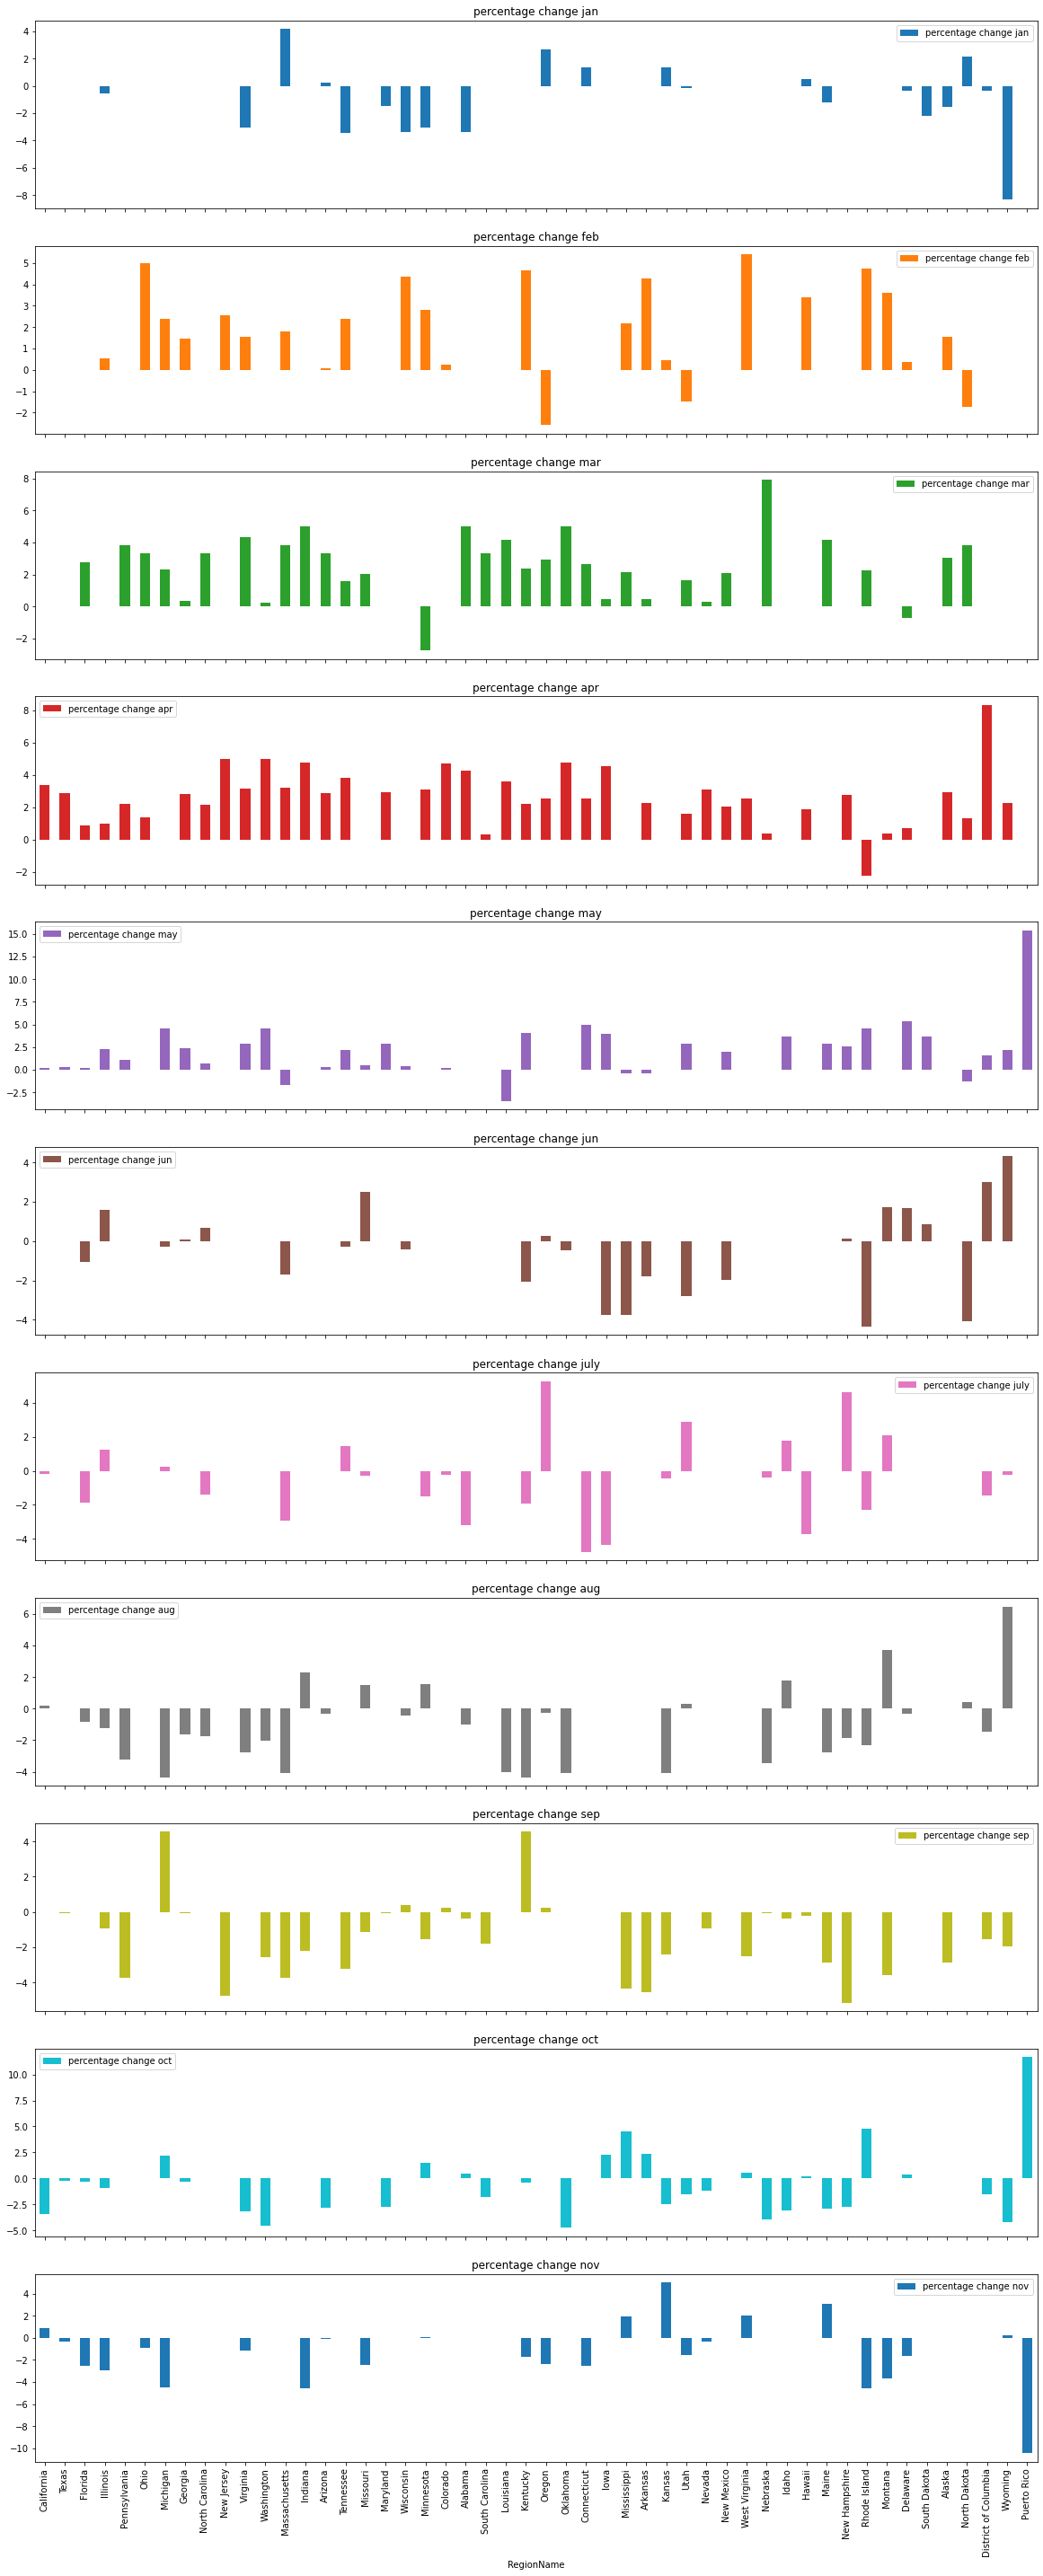

In [78]:
percent_change_rent_df.plot.bar(subplots=True,figsize=(20,50))

# growth trend in rent for top 10 states that are prefered renting

In [83]:
top_rent_df=states_to_rent_df.tail(10)

In [84]:
rent_trend_df=pd.merge(top_rent_df,state_rent_df1_2019,how='inner', on=['RegionName'])

In [86]:
rent_trend_df=rent_trend_df.filter(['percentage change jan',
       'percentage change feb', 'percentage change mar',
       'percentage change apr', 'percentage change may',
       'percentage change jun', 'percentage change july',
       'percentage change aug', 'percentage change sep',
       'percentage change oct', 'percentage change nov',
       'percentage change dec'])

In [87]:
rent_trend_df

,percentage change jan,percentage change feb,percentage change mar,percentage change apr,percentage change may,percentage change jun,percentage change july,percentage change aug,percentage change sep,percentage change oct,percentage change nov
RegionName,,,,,,,,,,,
Nevada,0.000000,0.000000,0.313480,3.125000,0.000000,0.000000,0.000000,0.000000,-0.909091,-1.192661,-0.340452
Oregon,2.647059,-2.578797,2.941176,2.571429,0.000000,0.278552,5.277778,-0.263852,0.264550,0.000000,-2.374670
Montana,0.000000,3.600000,0.000000,0.386100,0.000000,1.730769,2.079395,3.703704,-3.571429,0.000000,-3.703704
Washington,0.000000,0.000000,0.250627,5.000000,4.523810,0.000000,0.000000,-2.050114,-2.558140,-4.534606,0.000000
California,0.000000,0.000000,0.000000,3.392857,0.172712,0.000000,-0.172414,0.172712,-0.034483,-3.414971,0.892857
Colorado,0.000000,0.250627,0.000000,4.750000,0.238663,0.000000,-0.238095,0.000000,0.238663,0.000000,0.000000
District of Columbia,-0.332226,0.000000,0.000000,8.333333,1.538462,3.030303,-1.470588,-1.492537,-1.515152,-1.553846,0.015627
Idaho,0.000000,0.000000,0.000000,0.000000,3.703704,0.000000,1.785714,1.754386,-0.344828,-3.114187,0.000000
Utah,-0.163934,-1.477833,1.666667,1.639344,2.903226,-2.821317,2.903226,0.313480,0.000000,-1.562500,-1.587302


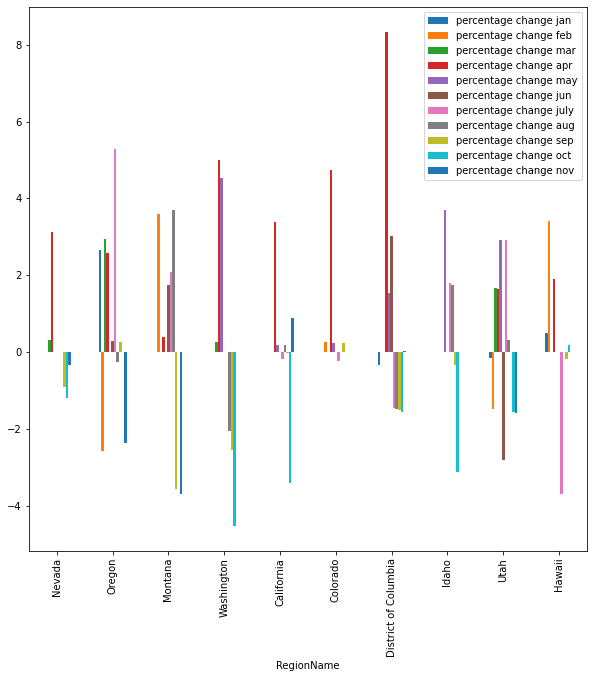

In [101]:
rent_trend_df.plot.bar(figsize=(10,10))
plt.show()

# calculating rent growth for 1 state

In [105]:
#%growth for one state
#could be expanded into a recursive function later
CO_growth_rent_df=percent_change_rent_df.loc['Nevada']

In [106]:
CO_growth_rent_df

percentage change jan     0.000000
percentage change feb     0.000000
percentage change mar     0.313480
percentage change apr     3.125000
percentage change may     0.000000
percentage change jun     0.000000
percentage change july    0.000000
percentage change aug     0.000000
percentage change sep    -0.909091
percentage change oct    -1.192661
percentage change nov    -0.340452
Name: Nevada, dtype: float64

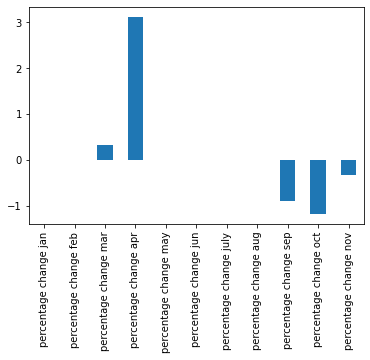

In [107]:
#Plotting bar graph 

CO_growth_rent_df.plot(kind='bar')
plt.show()

# Growth % calculation for purchases

In [60]:
state_buy_df1_2019=state_buy_df.filter(['2018-12-31','2019-01-31','2019-02-28','2019-03-31','2019-04-30','2019-05-31','2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31'])
state_buy_df1_2019.head(2)

,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31
RegionName,,,,,,,,,,,,,
California,562820.0,562344.0,561231.0,560722.0,560995.0,561637.0,562386.0,563398.0,564896.0,566911.0,569019.0,571142.0,574142.0
Texas,203278.0,204240.0,205167.0,205770.0,206192.0,206662.0,207244.0,207904.0,208526.0,209208.0,209696.0,210191.0,210559.0


In [66]:
state_buy_df1_2019['percentage change jan']= state_buy_df1_2019.pct_change(axis='columns' )['2019-01-31'].mul(100)
state_buy_df1_2019['percentage change feb']= state_buy_df1_2019.pct_change(axis='columns' )['2019-02-28'].mul(100)
state_buy_df1_2019['percentage change mar']= state_buy_df1_2019.pct_change(axis='columns' )['2019-03-31'].mul(100)
state_buy_df1_2019['percentage change apr']= state_buy_df1_2019.pct_change(axis='columns' )['2019-04-30'].mul(100)
state_buy_df1_2019['percentage change may']= state_buy_df1_2019.pct_change(axis='columns' )['2019-05-31'].mul(100)
state_buy_df1_2019['percentage change jun']= state_buy_df1_2019.pct_change(axis='columns' )['2019-06-30'].mul(100)
state_buy_df1_2019['percentage change july']= state_buy_df1_2019.pct_change(axis='columns' )['2019-07-31'].mul(100)
state_buy_df1_2019['percentage change aug']= state_buy_df1_2019.pct_change(axis='columns' )['2019-08-31'].mul(100)
state_buy_df1_2019['percentage change sep']= state_buy_df1_2019.pct_change(axis='columns' )['2019-09-30'].mul(100)
state_buy_df1_2019['percentage change oct']= state_buy_df1_2019.pct_change(axis='columns' )['2019-10-31'].mul(100)
state_buy_df1_2019['percentage change nov']= state_buy_df1_2019.pct_change(axis='columns' )['2019-11-30'].mul(100)
state_buy_df1_2019['percentage change dec']= state_buy_df1_2019.pct_change(axis='columns' )['2019-12-31'].mul(100)

In [67]:
percent_change_buy_df=state_buy_df1_2019.filter(['percentage change jan',
       'percentage change feb', 'percentage change mar',
       'percentage change apr', 'percentage change may',
       'percentage change jun', 'percentage change july',
       'percentage change aug', 'percentage change sep',
       'percentage change oct', 'percentage change nov',
       'percentage change dec'])

In [68]:
percent_change_buy_df

,percentage change jan,percentage change feb,percentage change mar,percentage change apr,percentage change may,percentage change jun,percentage change july,percentage change aug,percentage change sep,percentage change oct,percentage change nov,percentage change dec
RegionName,,,,,,,,,,,,
California,-0.084574,-0.197922,-0.090693,0.048687,0.114440,0.133360,0.179948,0.265887,0.356703,0.371840,0.373098,0.525263
Texas,0.473244,0.453878,0.293907,0.205083,0.227943,0.281619,0.318465,0.299177,0.327058,0.233261,0.236056,0.175079
New York,0.293921,0.297241,0.319099,0.274262,0.276149,0.211520,0.181830,0.163537,0.165886,0.201792,0.230793,0.271486
Florida,0.433927,0.288693,0.164211,0.160797,0.171529,0.220216,0.267041,0.258141,0.270700,0.303716,0.324452,0.306442
Illinois,0.052878,0.134349,0.136635,0.171423,0.119495,0.116406,0.150612,0.112177,0.056760,0.030809,0.028844,0.077220
Pennsylvania,0.389056,0.368643,0.238058,0.224965,0.265603,0.389038,0.399431,0.386504,0.344461,0.352487,0.326779,0.329272
Ohio,0.564049,0.492065,0.477329,0.358511,0.371492,0.426954,0.482408,0.468023,0.483195,0.450983,0.392095,0.387929
Michigan,0.456179,0.464483,0.315919,0.341572,0.347048,0.413815,0.454638,0.408455,0.445395,0.437507,0.492112,0.429954
Georgia,0.501297,0.403348,0.485549,0.487271,0.494526,0.398408,0.386794,0.414289,0.394165,0.376259,0.305706,0.329393


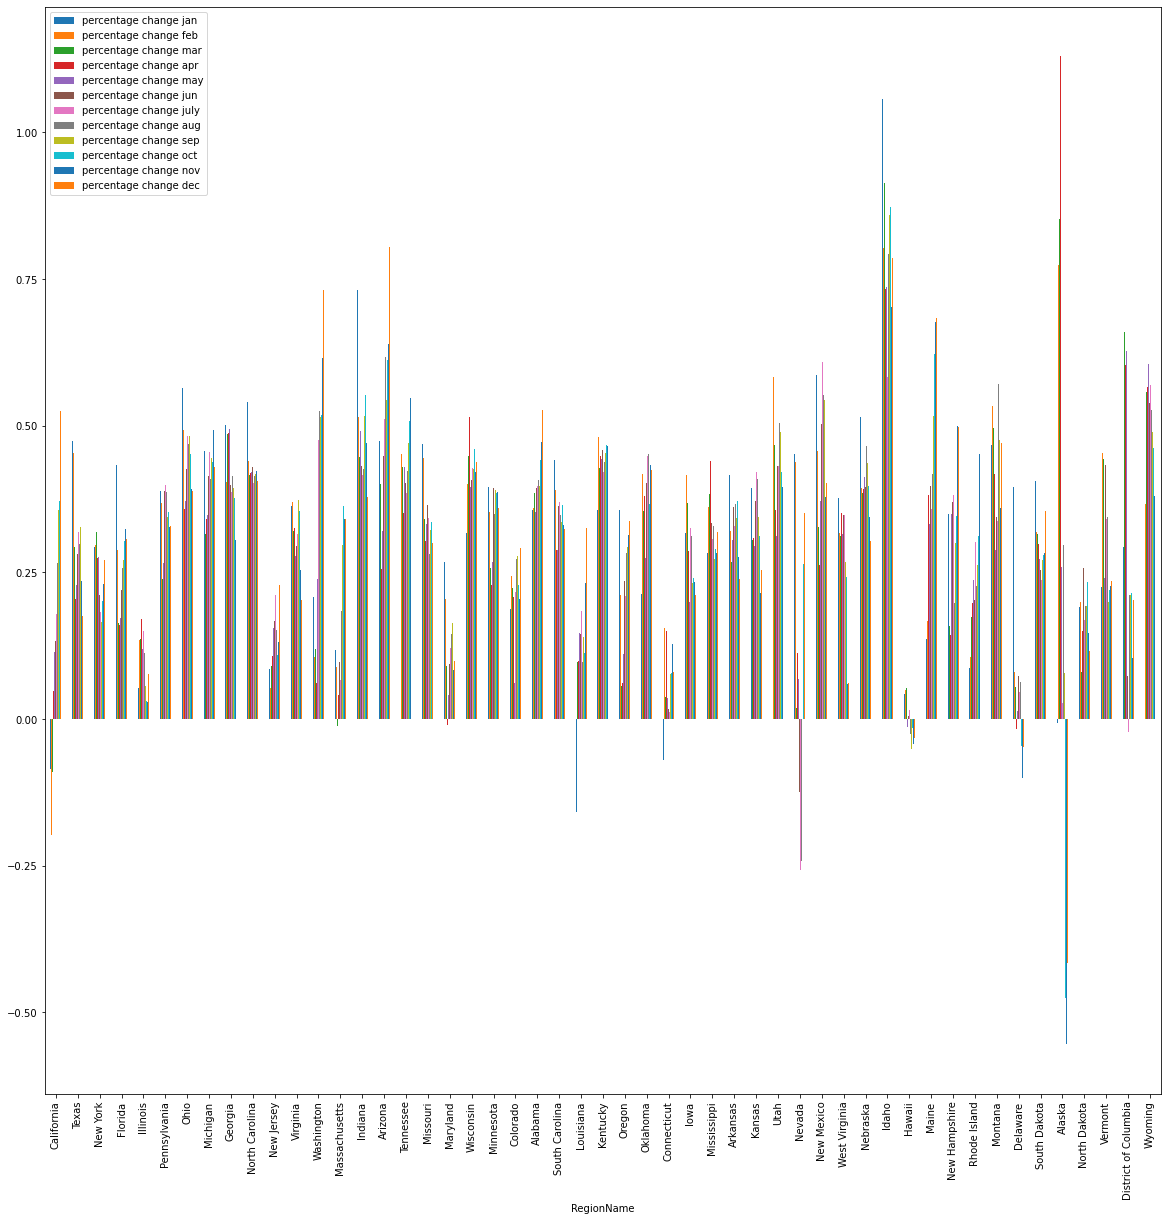

In [111]:
percent_change_buy_df.plot.bar(figsize=(20,20))
plt.show()

# growth trend in purchases for top 10 states that are prefered buying

In [114]:
top_buy_df=states_to_buy_df.head(10)
top_buy_df

,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,average_y,Average Annual Rent,price to rent ratio
RegionName,,,,,,,,,,,,,,,,,,,,,
West Virginia,103662.0,103990.0,104314.0,104681.0,105012.0,105377.0,105743.0,106091.0,106375.0,106632.0,...,1000.0,1000.0,1000,975,980.0,1000.0,975,1041.377358,12496.528302,8.437897
Mississippi,121821.0,122261.0,122731.0,123271.0,123716.0,124129.0,124511.0,124920.0,125260.0,125624.0,...,1150.0,1150.0,1150,1100,1150.0,1172.5,1150,993.774775,11925.297297,10.416274
Oklahoma,125496.0,126020.0,126468.0,126949.0,127298.0,127810.0,128383.0,128964.0,129481.0,129956.0,...,1095.0,1095.0,1050,1050,1000.0,1000.0,1000,1011.315789,12135.789474,10.563906
Arkansas,125077.0,125478.0,125813.0,126169.0,126555.0,127013.0,127431.0,127899.0,128338.0,128814.0,...,1100.0,1100.0,1100,1050,1075.0,1075.0,1050,961.834711,11542.016529,11.026619
Illinois,202458.0,202730.0,203007.0,203355.0,203598.0,203835.0,204142.0,204371.0,204487.0,204550.0,...,1575.0,1595.0,1575,1560,1545.0,1500.0,1500,1512.805785,18153.669421,11.227799
Louisiana,166587.0,166574.0,166737.0,166902.0,167148.0,167390.0,167699.0,167863.0,168098.0,168288.0,...,1250.0,1250.0,1200,1200,1200.0,1200.0,1200,1200.120833,14401.450000,11.637653
Kansas,147284.0,147733.0,148185.0,148642.0,149080.0,149633.0,150263.0,150878.0,151398.0,151871.0,...,1100.0,1095.0,1050,1025,1000.0,1050.0,1050,1035.418182,12425.018182,12.070734
Connecticut,270918.0,271340.0,271441.0,271849.0,271948.0,271993.0,272027.0,271967.0,272177.0,272390.0,...,2100.0,2000.0,2000,2000,2000.0,1950.0,2000,1871.694215,22460.330579,12.109283
Alabama,133989.0,134472.0,134991.0,135476.0,135955.0,136491.0,137034.0,137592.0,138138.0,138748.0,...,1095.0,1060.0,1049,1045,1050.0,1050.0,1050,937.654255,11251.851064,12.164132


In [116]:
buy_trend_df=pd.merge(top_buy_df,state_buy_df1_2019,how='inner', on=['RegionName'])
buy_trend_df

,2019-01-31_x,2019-02-28_x,2019-03-31_x,2019-04-30_x,2019-05-31_x,2019-06-30_x,2019-07-31_x,2019-08-31_x,2019-09-30_x,2019-10-31_x,...,percentage change mar,percentage change apr,percentage change may,percentage change jun,percentage change july,percentage change aug,percentage change sep,percentage change oct,percentage change nov,percentage change dec
RegionName,,,,,,,,,,,,,,,,,,,,,
West Virginia,103662.0,103990.0,104314.0,104681.0,105012.0,105377.0,105743.0,106091.0,106375.0,106632.0,...,0.311568,0.351822,0.316199,0.347579,0.347324,0.329100,0.267695,0.241598,0.059082,0.061859
Mississippi,121821.0,122261.0,122731.0,123271.0,123716.0,124129.0,124511.0,124920.0,125260.0,125624.0,...,0.384423,0.439987,0.360993,0.333829,0.307744,0.328485,0.272174,0.290596,0.283385,0.319098
Oklahoma,125496.0,126020.0,126468.0,126949.0,127298.0,127810.0,128383.0,128964.0,129481.0,129956.0,...,0.355499,0.380333,0.274914,0.402206,0.448322,0.452552,0.400887,0.366849,0.432454,0.425229
Arkansas,125077.0,125478.0,125813.0,126169.0,126555.0,127013.0,127431.0,127899.0,128338.0,128814.0,...,0.266979,0.282960,0.305939,0.361898,0.329100,0.367258,0.343240,0.370896,0.275591,0.238447
Illinois,202458.0,202730.0,203007.0,203355.0,203598.0,203835.0,204142.0,204371.0,204487.0,204550.0,...,0.136635,0.171423,0.119495,0.116406,0.150612,0.112177,0.056760,0.030809,0.028844,0.077220
Louisiana,166587.0,166574.0,166737.0,166902.0,167148.0,167390.0,167699.0,167863.0,168098.0,168288.0,...,0.097854,0.098958,0.147392,0.144782,0.184599,0.097794,0.139995,0.113029,0.231151,0.325474
Kansas,147284.0,147733.0,148185.0,148642.0,149080.0,149633.0,150263.0,150878.0,151398.0,151871.0,...,0.305957,0.308398,0.294668,0.370942,0.421030,0.409282,0.344649,0.312422,0.215314,0.253617
Connecticut,270918.0,271340.0,271441.0,271849.0,271948.0,271993.0,272027.0,271967.0,272177.0,272390.0,...,0.037223,0.150309,0.036417,0.016547,0.012500,-0.022057,0.077215,0.078258,0.127391,0.079930
Alabama,133989.0,134472.0,134991.0,135476.0,135955.0,136491.0,137034.0,137592.0,138138.0,138748.0,...,0.385954,0.359283,0.353568,0.394248,0.397828,0.407198,0.396825,0.441587,0.472800,0.526527


In [117]:
buy_trend_df=buy_trend_df.filter(['percentage change jan',
       'percentage change feb', 'percentage change mar',
       'percentage change apr', 'percentage change may',
       'percentage change jun', 'percentage change july',
       'percentage change aug', 'percentage change sep',
       'percentage change oct', 'percentage change nov',
       'percentage change dec'])
buy_trend_df

,percentage change jan,percentage change feb,percentage change mar,percentage change apr,percentage change may,percentage change jun,percentage change july,percentage change aug,percentage change sep,percentage change oct,percentage change nov,percentage change dec
RegionName,,,,,,,,,,,,
West Virginia,0.376672,0.316413,0.311568,0.351822,0.316199,0.347579,0.347324,0.329100,0.267695,0.241598,0.059082,0.061859
Mississippi,0.283181,0.361186,0.384423,0.439987,0.360993,0.333829,0.307744,0.328485,0.272174,0.290596,0.283385,0.319098
Oklahoma,0.214010,0.417543,0.355499,0.380333,0.274914,0.402206,0.448322,0.452552,0.400887,0.366849,0.432454,0.425229
Arkansas,0.416673,0.320603,0.266979,0.282960,0.305939,0.361898,0.329100,0.367258,0.343240,0.370896,0.275591,0.238447
Illinois,0.052878,0.134349,0.136635,0.171423,0.119495,0.116406,0.150612,0.112177,0.056760,0.030809,0.028844,0.077220
Louisiana,-0.158823,-0.007804,0.097854,0.098958,0.147392,0.144782,0.184599,0.097794,0.139995,0.113029,0.231151,0.325474
Kansas,0.393301,0.304853,0.305957,0.308398,0.294668,0.370942,0.421030,0.409282,0.344649,0.312422,0.215314,0.253617
Connecticut,-0.069346,0.155767,0.037223,0.150309,0.036417,0.016547,0.012500,-0.022057,0.077215,0.078258,0.127391,0.079930
Alabama,0.355768,0.360477,0.385954,0.359283,0.353568,0.394248,0.397828,0.407198,0.396825,0.441587,0.472800,0.526527


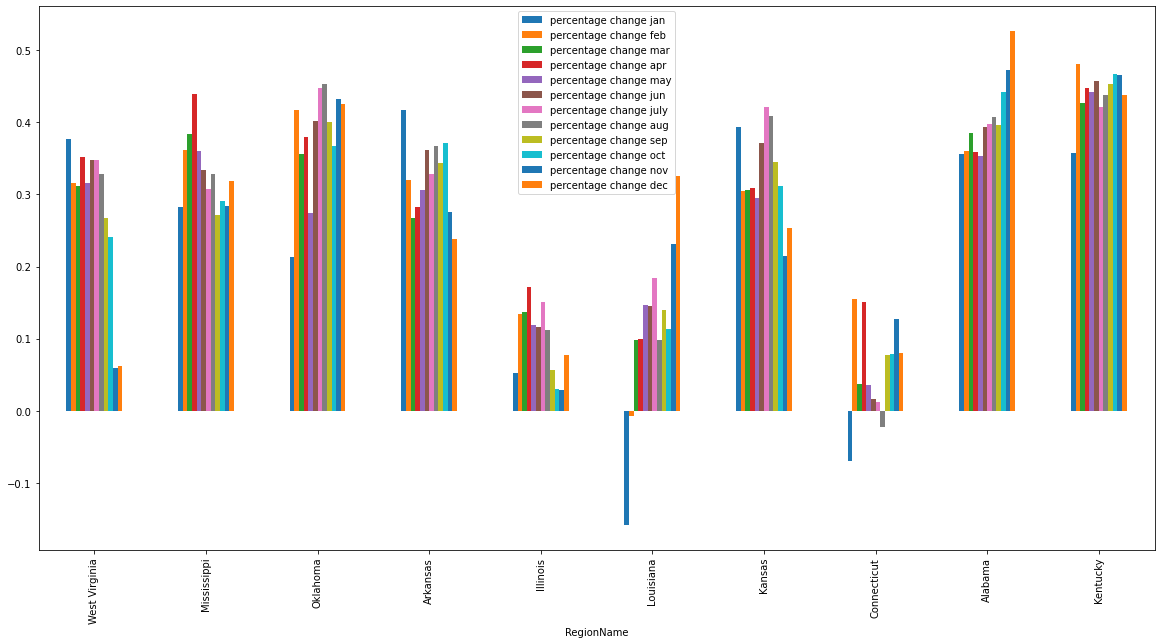

In [119]:
buy_trend_df.plot.bar(figsize=(20,10))
plt.show()

# growth for 1 state

In [35]:
#%growth for one state
#could be expanded to a recursive function later
CO_growth_buy_df=percent_change_buy_df.loc['Colorado']

In [36]:
CO_growth_buy_df

percentage change jan          NaN
percentage change feb     0.002441
percentage change mar     0.002235
percentage change apr     0.002090
percentage change may     0.000613
percentage change jun     0.001607
percentage change july    0.002169
percentage change aug     0.002733
percentage change sep     0.002782
percentage change oct     0.002289
percentage change nov     0.002040
percentage change dec     0.002920
Name: Colorado, dtype: float64

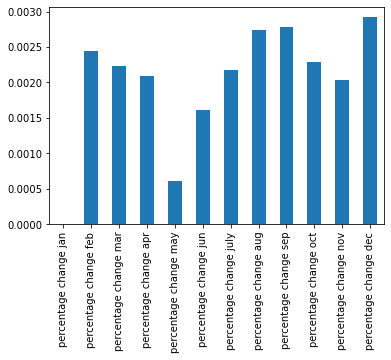

In [40]:
#Plotting bar graph 

CO_growth_buy_df.plot(kind='bar')
plt.show()